In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


Inspect Data

In [12]:
landed = pd.read_csv("data\LandedArea.csv")
apartments = pd.read_csv('data\ApartmentsandCondos.csv')

resale_registration_1 = pd.read_csv("data/resale-flat-prices_HDB/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
resale_registration_2 = pd.read_csv("data/resale-flat-prices_HDB/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
resale_registration_3 = pd.read_csv("data/resale-flat-prices_HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

resale_approval_1 = pd.read_csv("data/resale-flat-prices_HDB/resale-flat-prices-based-on-approval-date-1990-1999.csv")
resale_approval_2 = pd.read_csv("data/resale-flat-prices_HDB/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")

A look of resale by registration

In [13]:
resale_registration_1.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,52203.000000,52203.000000,5.220300e+04
mean,96.203285,1989.512902,4.612147e+05
std,24.984010,10.139550,1.225534e+05
min,31.000000,1966.000000,1.950000e+05
25%,73.000000,1983.000000,3.700000e+05
50%,95.000000,1988.000000,4.400000e+05
75%,111.000000,1999.000000,5.250000e+05
max,266.000000,2012.000000,1.088888e+06


In [17]:
print(resale_registration_1.columns)
print(resale_registration_2.columns)
print(resale_registration_3.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


It seems like the 3 dataset have the same price so we append them and then write to a final csv, for a better representation of the data

In [19]:
resale_registration_full = resale_registration_1
resale_registration_full = resale_registration_full.append(resale_registration_2)
resale_registration_full = resale_registration_full.append(resale_registration_3)
print(resale_registration_full.shape)
print(resale_registration_1.shape[0]+ resale_registration_2.shape[0] + resale_registration_3.shape[0])

(157517, 11)
157517


In [20]:
## Append works. So we write to a csv
resale_registration_full.to_csv("data/resale-flat-prices_HDB/resale-on-registration-full.csv")

In [21]:
print(resale_approval_1.columns)
print(resale_approval_2.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [22]:
resale_approval_full = resale_approval_1
resale_approval_full = resale_approval_full.append(resale_approval_2)
print(resale_approval_full.shape)
print(resale_approval_1.shape[0] + resale_approval_2.shape[0])
resale_approval_full.to_csv("data/resale-flat-prices_HDB/resale-on-approval-full.csv", index=False)

(656851, 10)
656851


In [31]:
resale_approval_full = pd.read_csv("data/resale-flat-prices_HDB/resale-on-approval-full.csv")

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
resale_approval_full.tail(7)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
656844,2012-02,YISHUN,5 ROOM,161,YISHUN ST 11,10 TO 12,121.0,Improved,1985,465000.0
656845,2012-02,YISHUN,5 ROOM,161,YISHUN ST 11,04 TO 06,121.0,Improved,1985,503000.0
656846,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
656847,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
656848,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
656849,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0
656850,2012-02,YISHUN,EXECUTIVE,293,YISHUN ST 22,04 TO 06,163.0,Apartment,1992,630000.0


In [15]:
resale_registration_full.head(7)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,172,Improved,2 ROOM,45.0,1986,2012-03,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO
1,510,Improved,2 ROOM,44.0,1980,2012-03,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO
2,610,New Generation,3 ROOM,68.0,1980,2012-03,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO
3,474,New Generation,3 ROOM,67.0,1984,2012-03,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO
4,604,New Generation,3 ROOM,67.0,1980,2012-03,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO
5,154,New Generation,3 ROOM,68.0,1981,2012-03,NaN,321000.0,01 TO 05,ANG MO KIO AVE 5,ANG MO KIO
6,110,New Generation,3 ROOM,67.0,1978,2012-03,NaN,323000.0,01 TO 05,ANG MO KIO AVE 4,ANG MO KIO


In [4]:
## Import necessary ML functions/modules
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer

In [5]:
## Analysis using resale_registration_full
## 1. Process data
resale_registration_full = pd.read_csv("data/resale-flat-prices_HDB/resale-on-registration-full.csv")
resale_registration_full = resale_registration_full.fillna(0)

def convert_remaining_lease(s):
    if s == 0:
        return 0
    elif type(s) == float:
        return s
    elif type(s) == str:
        list_s = s.split(' ')
        if len(list_s) == 2:  ## X years
            return int(list_s[0])
        elif len(list_s) == 4:  ## X years Y months
            return(int(list_s[0]) + float(list_s[2]))
        elif len(list_s) == 1:  ## 78
            return(float(s))
    elif type(s == int):
        return float(s)
    raise Exception(f"Weird remaining_lease format: {s}, type: {type(s)}")
            
def to_lower_alpha(s:str):
    return(s.lower())

def months_since2012(s:str):
    ## months are in this format: YYYY-MM
    YYMM =s.split('-')
    return (12 * (int(YYMM[0]) - 2012) + (int(YYMM[1]))) 
        
resale_registration_full['flat_model'] = resale_registration_full['flat_model'].apply(to_lower_alpha)
resale_registration_full['remaining_lease'] = resale_registration_full['remaining_lease'].apply(convert_remaining_lease)
resale_registration_full['month'] = resale_registration_full['month'].apply(months_since2012)

le = LabelEncoder()
resale_registration_full['storey_range'] = le.fit_transform(resale_registration_full['storey_range'])
lb = LabelBinarizer()
lb.fit(resale_registration_full['flat_model'])
full_flat_model = pd.DataFrame(lb.transform(resale_registration_full['flat_model']), columns=lb.classes_)
lb.fit(resale_registration_full['flat_type'])
full_flat_type = pd.DataFrame(lb.transform(resale_registration_full['flat_type']), columns=lb.classes_)
lb.fit(resale_registration_full['town'])
full_town = pd.DataFrame(lb.transform(resale_registration_full['town']), columns=lb.classes_)
lb.fit(resale_registration_full['street_name'])
full_street_name = pd.DataFrame(lb.transform(resale_registration_full['street_name']), columns=lb.classes_)

resale_registration_full = resale_registration_full.drop(["flat_model", "flat_type", "town", "street_name"], axis=1)
resale_registration_full = pd.merge(resale_registration_full, full_flat_model, left_index=True, right_index=True)
resale_registration_full = pd.merge(resale_registration_full, full_flat_type, left_index=True, right_index=True)
resale_registration_full = pd.merge(resale_registration_full, full_town, left_index=True, right_index=True)
resale_registration_full = pd.merge(resale_registration_full, full_street_name, left_index=True, right_index=True)
print(resale_registration_full.shape)


X = resale_registration_full.drop(['resale_price','block'], axis=1)
X = X.reset_index(drop=True)
y = resale_registration_full['resale_price']

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(157517, 606)


In [6]:
X.tail()

,floor_area_sqm,lease_commence_date,month,remaining_lease,storey_range,2-room,adjoined flat,apartment,dbss,improved,...,YISHUN ST 72,YISHUN ST 81,YUAN CHING RD,YUNG AN RD,YUNG HO RD,YUNG KUANG RD,YUNG LOH RD,YUNG PING RD,YUNG SHENG RD,ZION RD
157512,146.0,1988,98,76.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157513,147.0,1987,98,72.0,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
157514,164.0,1992,98,75.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
157515,142.0,1987,98,75.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
157516,145.0,1987,98,74.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
print(X.shape)
print(y.shape)

(157517, 604)
(157517,)


In [10]:
## Split into train and test
X_train = X[X['month'] <= 80]
X_test = X[X['month'] > 80]
y_train = y.iloc[:X_train.shape[0]]
y_test = y.iloc[X_train.shape[0]:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124160, 604)
(33357, 604)
(124160,)
(33357,)


### ML Techniques

In [11]:
## ML techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train, y_train))

br = BayesianRidge()
br.fit(X_train, y_train)
print(br.score(X_train, y_train))

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41294074394644.74, tolerance: 230410721338.46286
  positive)


0.9214351442936981
0.9214857293439868


RFC - it takes really long to run this so I haven't

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))

Evaluation on ML techniques

In [18]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

## remember to define y_test proper outside of this function.
def predict_skmodel(model, X_test, reg_metrics=True):
    model_pred = model.predict(X_test)
    
    if reg_metrics==True:
        print("MSE: ", mean_squared_error(y_test, model_pred))
        print("Explained Variance: ", explained_variance_score(y_test, model_pred))
        print("R^2: ", r2_score(y_test, model_pred))
    return model_pred

In [19]:
lasso_pred = predict_skmodel(lasso, X_test)
br_pred = predict_skmodel(br, X_test)

MSE:  10534264748.76083
Explained Variance:  0.5506637872424395
R^2:  0.5503634359507997
MSE:  10507497461.074848
Explained Variance:  0.5517463080373274
R^2:  0.5515059505496906


In [52]:
## Rolling predictions
roll_df = pd.concat([X,y], axis=1)
max_month = np.amax(roll_df['month'])
temp_mth = 0

while temp_mth < (max_month-12):
    X_train = roll_df[(roll_df['month'] > temp_mth) & (roll_df['month'] <= temp_mth+12)].drop('resale_price',axis=1)
    X_test = roll_df[(roll_df['month'] > temp_mth+12) & (roll_df['month'] <= temp_mth+24)].drop('resale_price', axis=1)
    y_train = roll_df[(roll_df['month'] > temp_mth) & (roll_df['month'] <= temp_mth+12)]['resale_price']
    y_test = roll_df[(roll_df['month'] > temp_mth+12) & (roll_df['month'] <= temp_mth+24)]['resale_price']

    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    ## fitting
    lasso = Lasso()
    lasso.fit(X_train,y_train)
    print(f"Fitted Months MSE ({temp_mth} - {temp_mth+12}): ", lasso.score(X_train, y_train))

    br = BayesianRidge()
    br.fit(X_train, y_train)
    print(f"Fitted Months MSE ({temp_mth} - {temp_mth+12}): ", br.score(X_train, y_train))
    
    ## pred results
    print("LASSO EVAL")
    lasso_pred = predict_skmodel(lasso, X_test)
    print("BAYESIAN RIDGE EVAL")
    br_pred = predict_skmodel(br, X_test)
    print("\n")
    
    temp_mth += 12

(20010, 604)
(20010,)
(16097, 604)
(16097,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2877960770083.365, tolerance: 27287742860.431416
  positive)


Fitted Months MSE (0 - 12):  0.9410733217483918
Fitted Months MSE (0 - 12):  0.9410643134999226
LASSO EVAL
MSE:  1733970293.6365995
Explained Variance:  0.9205413632764987
R^2:  0.8920958998226598
BAYESIAN RIDGE EVAL
MSE:  1732160829.0426838
Explained Variance:  0.9206520310623119
R^2:  0.8922085018952131


(16097, 604)
(16097,)
(16096, 604)
(16096,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1778761354724.2354, tolerance: 25867154047.710392
  positive)


Fitted Months MSE (12 - 24):  0.9437414581108698
Fitted Months MSE (12 - 24):  0.9436819052823179
LASSO EVAL
MSE:  1351932907.6181686
Explained Variance:  0.920355792930838
R^2:  0.9104909580340015
BAYESIAN RIDGE EVAL
MSE:  1343974175.7938077
Explained Variance:  0.9211422796469688
R^2:  0.9110178913284339


(16096, 604)
(16096,)
(17780, 604)
(17780,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2785527995103.212, tolerance: 24311188683.36028
  positive)


Fitted Months MSE (24 - 36):  0.9354054114328033
Fitted Months MSE (24 - 36):  0.9353413233991351
LASSO EVAL
MSE:  1617284873.4610925
Explained Variance:  0.916209256051058
R^2:  0.9077969852626792
BAYESIAN RIDGE EVAL
MSE:  1561436175.4074688
Explained Variance:  0.9191509447461648
R^2:  0.9109809749321542


(17780, 604)
(17780,)
(19373, 604)
(19373,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10179911803611.424, tolerance: 31186968378.485107
  positive)


Fitted Months MSE (36 - 48):  0.9357891075411521
Fitted Months MSE (36 - 48):  0.9357325010606902
LASSO EVAL
MSE:  1374887853.5500004
Explained Variance:  0.9287602985183755
R^2:  0.9286227677589972
BAYESIAN RIDGE EVAL
MSE:  1376318485.8313594
Explained Variance:  0.9286972561463636
R^2:  0.928548496557652


(19373, 604)
(19373,)
(20509, 604)
(20509,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11937964949514.176, tolerance: 37316804743.688576
  positive)


Fitted Months MSE (48 - 60):  0.9373478992066453
Fitted Months MSE (48 - 60):  0.9373189078476121
LASSO EVAL
MSE:  1865604131.389595
Explained Variance:  0.925677439115153
R^2:  0.9161305222924156
BAYESIAN RIDGE EVAL
MSE:  2083326849.5047
Explained Variance:  0.9234634368630544
R^2:  0.9063426523224942


(20509, 604)
(20509,)
(21875, 604)
(21875,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6109624874799.014, tolerance: 45620500063.289604
  positive)


Fitted Months MSE (60 - 72):  0.9375180912796819
Fitted Months MSE (60 - 72):  0.9374658622732422
LASSO EVAL
MSE:  1824378142.2562718
Explained Variance:  0.926112121388409
R^2:  0.9260708094717482
BAYESIAN RIDGE EVAL
MSE:  1819384594.4116797
Explained Variance:  0.926317868227063
R^2:  0.9262731627785897


(21875, 604)
(21875,)
(22194, 604)
(22194,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7763358439058.207, tolerance: 53981751425.51462
  positive)


Fitted Months MSE (72 - 84):  0.9358185693920468
Fitted Months MSE (72 - 84):  0.9357817563082795
LASSO EVAL
MSE:  1862761560.1237767
Explained Variance:  0.9214614446103765
R^2:  0.9214292379727158
BAYESIAN RIDGE EVAL
MSE:  1822852945.5129902
Explained Variance:  0.9231720840290905
R^2:  0.9231125721838933


(22194, 604)
(22194,)
(3583, 604)
(3583,)


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7043746206317.061, tolerance: 52617702818.041664
  positive)


Fitted Months MSE (84 - 96):  0.9378410993170592
Fitted Months MSE (84 - 96):  0.9378090061653396
LASSO EVAL
MSE:  1566483601.343356
Explained Variance:  0.930531830193098
R^2:  0.9304955132844933
BAYESIAN RIDGE EVAL
MSE:  1569004679.2853384
Explained Variance:  0.9304174891449198
R^2:  0.9303836536849566




In [46]:
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train, y_train))

br = BayesianRidge()
br.fit(X_train, y_train)
print(br.score(X_train, y_train))

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1778761354724.2354, tolerance: 25867154047.710392
  positive)


0.9437414581108698
0.9436819052823179


In [47]:
## predictions
lasso_rollingpred = predict_skmodel(lasso,X_test)
br_rolling_pred = predict_skmodel(br,X_test)

MSE:  1351932907.6181686
Explained Variance:  0.920355792930838
R^2:  0.9104909580340015
MSE:  1343974175.7938077
Explained Variance:  0.9211422796469688
R^2:  0.9110178913284339


It seems that rolling predictions work better. This might likely be due to structural information that 
might be lost but persisted in the future due to models taking averages over the whole time period to
minimise loss functions.

In [44]:
y_train.head()

109706    250000.0
109707    300000.0
109708    328000.0
109709    300000.0
109710    273000.0
Name: resale_price, dtype: float64

In [ ]:
## Analysis using resale_approval_full
## 1. Process data
resale_approval_full = resale_approval_full.fillna(0)


In [ ]:
## ML techniques


### Using URA's data
LandedArea.csv<br></br>ApartmentsandCondos.csv

In [5]:
landed.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,1,ONE TREE HILL COLLECTION,JALAN KELAWAR,Detached,10,CCR,Freehold,New Sale,1.0,15500000.0,-,5145.0,Land,-,3013.0,Feb-20
1,2,BAN GUAN PARK,HOLLAND ROAD,Detached,10,CCR,Freehold,Resale,1.0,15500000.0,-,9050.0,Land,-,1713.0,Feb-20
2,3,LANDED HOUSING DEVELOPMENT,CORONATION ROAD WEST,Detached,10,CCR,Freehold,Resale,1.0,9380000.0,-,6242.0,Land,-,1503.0,Feb-20
3,4,LANDED HOUSING DEVELOPMENT,JALAN AMPANG,Semi-detached,10,CCR,Freehold,Resale,1.0,6600000.0,-,4529.0,Land,-,1457.0,Feb-20
4,5,LANDED HOUSING DEVELOPMENT,JALAN JAMBU AYER,Detached,21,RCR,Freehold,Resale,1.0,8600000.0,-,6218.0,Land,-,1383.0,Feb-20


In [9]:
landed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 16 columns):
S/N                  843 non-null object
Project Name         848 non-null object
Street Name          837 non-null object
Type                 837 non-null object
Postal District      837 non-null object
Market Segment       837 non-null object
Tenure               837 non-null object
Type of Sale         836 non-null object
No. of Units         836 non-null float64
Price ($)            836 non-null float64
Nett Price ($)       836 non-null object
Area (Sqft)          836 non-null float64
Type of Area         836 non-null object
Floor Level          836 non-null object
Unit Price ($psf)    836 non-null float64
Date of Sale         836 non-null object
dtypes: float64(4), object(12)
memory usage: 106.8+ KB


In [6]:
# Running testing for landed since its sample size is smaller
landed_sfp = landed[['Type', 'Area (Sqft)', 'Unit Price ($psf)']]
landed_sfp = landed_sfp.dropna()
landed_sfp = pd.pivot_table(landed_sfp, values='Unit Price ($psf)', 
                     index=['Type'], 
                     columns='Area (Sqft)')
landed_sfp = landed_sfp.fillna(0)
landed_sfp.tail()

Area (Sqft),1489.0,1491.0,1496.0,1530.0,1532.0,1579.0,1615.0,1628.0,1640.0,1643.0,...,27829.0,29710.0,29955.0,30420.0,31211.0,36883.0,39228.0,43927.0,52059.0,66453.0
Type,,,,,,,,,,,,,,,,,,,,,
Detached,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,858.0,1548.0,1335.0,1430.0,1310.0,1000.0,1117.0,1309.0,1804.0,3281.0
Semi-detached,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Terrace,1511.0,1509.0,1521.0,1242.0,1815.0,1932.0,2294.583333,1628.0,1560.666667,1711.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


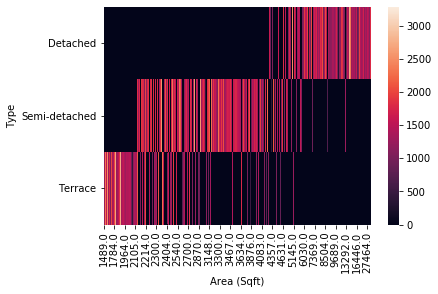

In [35]:
sns.heatmap(landed_sfp)

### Predictions
Using Machine Learning techniques to try to obtain metries such as:
- Accuracy
- MSE

Depending on method used

In [ ]:
%%bash
## installs necessary libraries for work below
!pip install sklearn

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# preprocessing
def split_X_and_y(df):
    '''
        - preprocessing is done here
        - returns processed X and y values
    '''
    df = df.dropna()  # there should b a better way of handling NA valus but I LAZY
    
    # 1. seperate labels from predictors
    y = df[df.columns[14]]  #Unit price per sq foot
    cols_to_remove = df.columns[[0,9,10,13,14]]
    X = df.drop(cols_to_remove, axis=1)
    
    # 2. encode data fit for prediction
    X_num = X.iloc[:,[7,8]]
    categorical_var = X.drop(["No. of Units", "Area (Sqft)"], axis=1)

    X_cat = pd.get_dummies(categorical_var)
    X = pd.concat([X_cat, X_num], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    return X_train, X_test, y_train, y_test

from sklearn.model_selection import GridSearchCV
def train_data(estimator, params, X_train, y_train):
    ## import the sklearn libraries first
    reg_grid = GridSearchCV(estimator, params)
    reg_grid.fit(X_train, y_train)
    
    return reg_grid.best_estimator_
    

In [108]:
X_train, X_test, y_train, y_test = split_X_and_y(landed)

In [109]:
sum(X_train.isna().iloc[:,6])

0

In [110]:
from sklearn.linear_model import Lasso
best_reg = train_data(estimator=Lasso(),
                     params={
                         'alpha': [0.5,1],
                         'normalize' : [True, False],
                         'max_iter': [200, 500, 1000, 10000],
                         'warm_start' : [True, False]
                     },
                     X_train=X_train,
                     y_train=y_train)

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2164681.303028632, tolerance: 9552.54064231537
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016181.1567478143, tolerance: 10139.614333333333
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2330274.8713892847, tolerance: 10497.877685258964
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222237.40231450275, tolerance: 10477.63292749004
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741850.2936997339, tolerance: 9552.54064231537
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663934.2700739726, tolerance: 10139.614333333333
  positive)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
preds = best_reg.predict(X_test)
metrics = {
    'mse': mean_squared_error(preds , y_test),
    'rSquared' : r2_score(preds, y_test)
}

metrics

{'mse': 102733.52728266607, 'rSquared': -0.25659047002398094}

Well it's obvious that it would fit bad LOL